# Find Mountaintops Using Deep-Learning

## Model Building

#### created by [**Etzion Harari**](https://github.com/EtzionR)


## Imports:

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

## Load data:

In [2]:
data = np.load('tops.npy')
tags = pd.read_csv('tags.csv')
rows = data.shape[0]
cols = data.shape[1]

## Show Data:

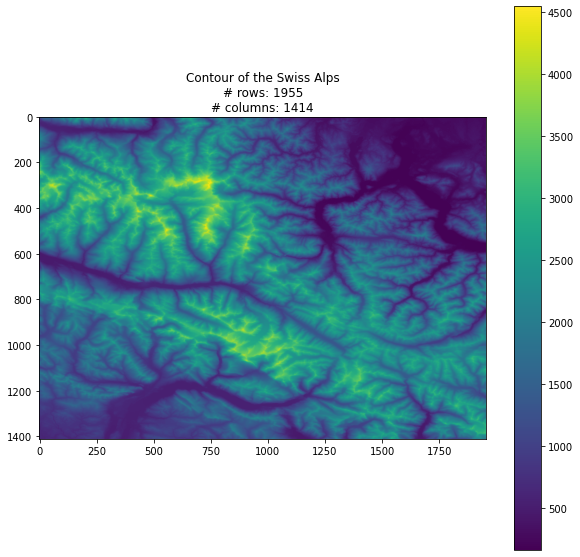

In [3]:
plt.figure(figsize=(10,10))
cmp = plt.imshow(data.T)
plt.colorbar(cmp)
plt.title(f'Contour of the Swiss Alps\n# rows: {rows}\n# columns: {cols}')
plt.show()

## Mountaintops - Examples:

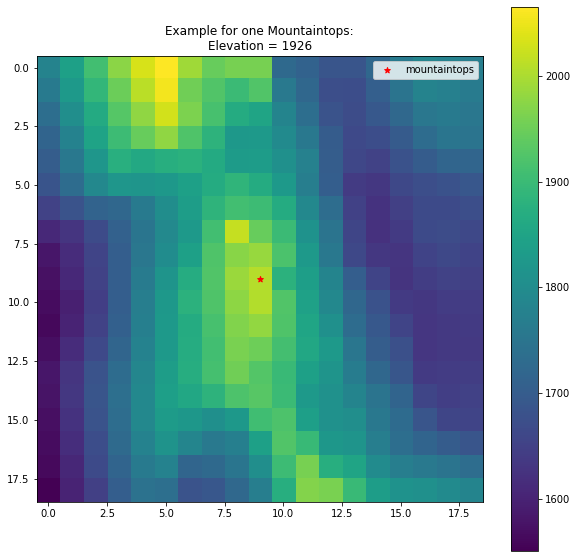

In [4]:
line= tags[tags['top']==1].iloc[0]
row = int(line['row'])
col = int(line['col'])
res = 10  # resolution
img = data[row-(res-1):row+res,
           col-(res-1):col+res]

# plot
plt.figure(figsize=(10,10))
cmp = plt.imshow(img)
plt.scatter(res-1,res-1, marker='*', c='red', label='mountaintops')
plt.colorbar(cmp)
plt.legend()
plt.title(f'Example for one Mountaintops:\nElevation = {img[res,res]}')
plt.show()

## Mountain sides - Examples:

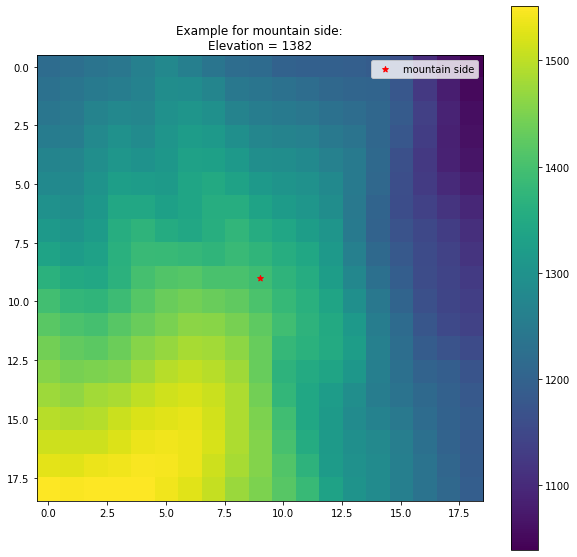

In [5]:
line= tags[tags['top']==0].iloc[0]
row = int(line['row'])
col = int(line['col'])
res = 10  # resolution
img = data[row-(res-1):row+res,
           col-(res-1):col+res]

# plot
plt.figure(figsize=(10,10))
cmp = plt.imshow(img)
plt.scatter(res-1,res-1, marker='*', c='red', label='mountain side')
plt.colorbar(cmp)
plt.legend()
plt.title(f'Example for mountain side:\nElevation = {img[res,res]}')
plt.show()

## Data Processing:

1781.0


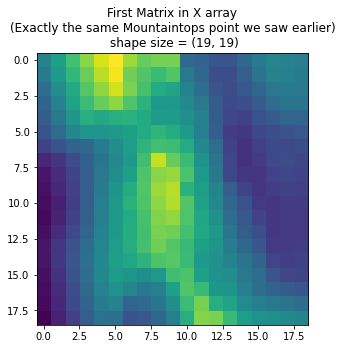

In [52]:
reso = 10  # resolution
Y = tags['top']
X = tags.apply(lambda line: data[int(line['row'])-(reso-1): int(line['row'])+reso,
                                 int(line['col'])-(reso-1): int(line['col'])+reso], axis=1)
X = np.array([np.asarray(x_i).astype(np.float64) for x_i in X])

plt.figure(figsize=(5,5))
plt.imshow(X[0])
plt.title(f'First Matrix in X array\n(Exactly the same Mountaintops point we saw earlier)\n shape size = {X[0].shape}')
plt.show()

## Split Data to train and test:

In [86]:
splitter = np.random.random(len(Y))
ratio = 0.9

X_train =X[splitter< ratio]
Y_train =Y[splitter< ratio]

X_test = X[splitter>=ratio]
Y_test = Y[splitter>=ratio]

## Model definition:

In [140]:
shape = ((reso*2)-1, (reso*2)-1)
model = keras.Sequential([layers.Flatten(input_shape=shape),
                          layers.BatchNormalization(),
                          layers.Dense(512, activation='relu'),
                          layers.Dropout(0.25),
                          layers.BatchNormalization(),
                          layers.Dense(512, activation='relu'),
                          layers.Dropout(0.25),
                          layers.BatchNormalization(),
                          layers.Dense(1, activation='sigmoid')])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['binary_accuracy'])

## Run the Model:

In [141]:
batch, epoch = 512, 500
fit = model.fit(X_train, Y_train, batch_size=512,epochs=500,verbose=0)

INFO:tensorflow:Assets written to: Mountaintops_model\assets


## Model Evaluation:

46/46 [==============================] - 0s 4ms/step - loss: 0.0877 - binary_accuracy: 0.9726
model loss: 0.088
model accuracy: 97.3%


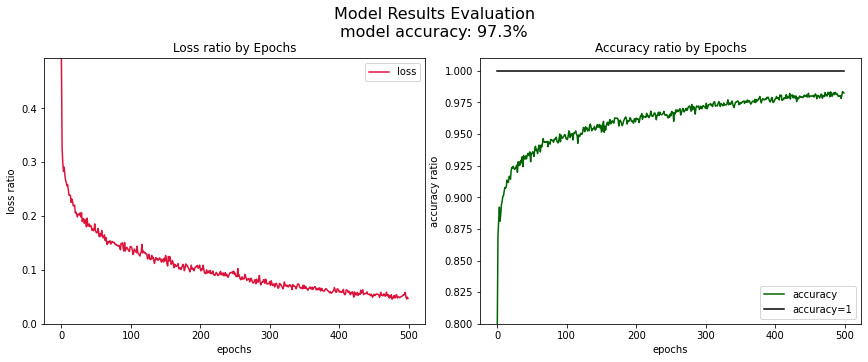

In [176]:
loss, accuracy = model.evaluate(X_test,  Y_test)
print(f'model loss: {round(loss,3)}\nmodel accuracy: {round(accuracy*100,1)}%')

epoch=500
evl = fit.history

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle(f'Model Results Evaluation\nmodel accuracy: {round(accuracy*100,1)}%', fontsize=16)

ax1.plot(np.arange(epoch),evl['loss'], c='crimson', label='loss')
ax1.set_title('Loss ratio by Epochs')
ax1.set_ylabel('loss ratio')
ax1.set_xlabel('epochs')
ax1.set_ylim(0,max(evl['loss']))
ax1.legend()

ax2.plot(np.arange(epoch),evl['binary_accuracy'], c='darkgreen', label='accuracy')
ax2.set_title('Accuracy ratio by Epochs')
ax2.set_ylabel('accuracy ratio')
ax2.set_xlabel('epochs')
ax2.plot(np.arange(epoch),[1]*epoch, c='black', label='accuracy=1')
ax2.set_ylim(0.8,1.01)
ax2.legend()

fig.tight_layout(pad=0.5)
plt.show()

## Errors Exploration:

number of errors: 40
from 1461 records


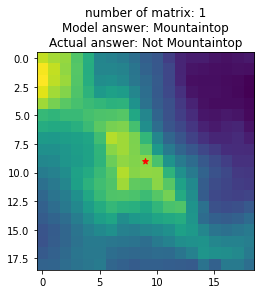

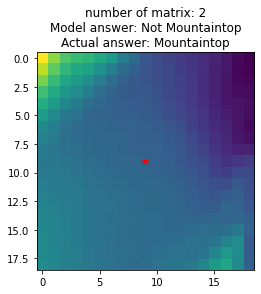

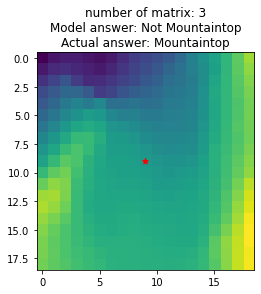

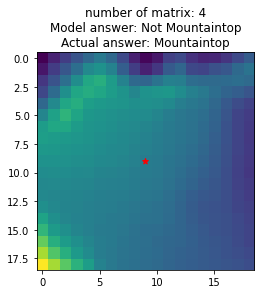

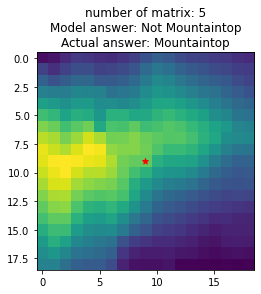

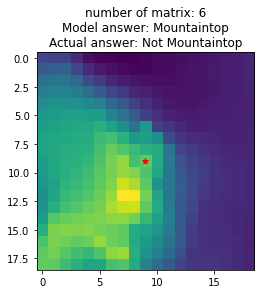

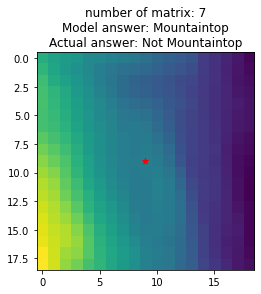

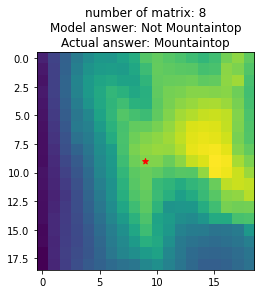

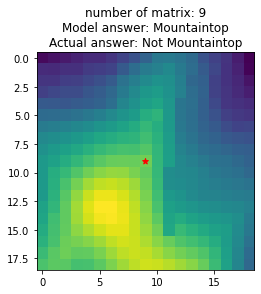

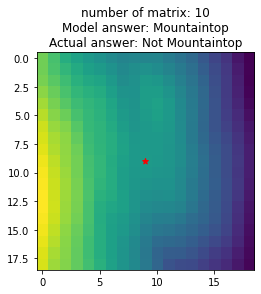

In [178]:
Y_pred = np.round(model.predict(X_test).T[0],0)
X_errors = X_test[Y_pred!=Y_test]
Y_errors = Y_test[Y_pred!=Y_test]
print(f'number of errors: {len(X_errors)}\nfrom {len(Y_pred)} records')

end = 10
dct = {0:'Not Mountaintop',1:'Mountaintop'}
for i in range(len(Y_errors[:end])):
    mat = X_errors[i]
    ans = int(Y_errors.iloc[i])
    plt.imshow(mat)
    plt.scatter(reso-1,reso-1, marker='*', c='red')
    plt.title(f'number of matrix: {i+1}\nModel answer: {dct[ans]}\nActual answer: {dct[1-ans]}')
    plt.savefig('pictures\error'+str(i+1))
    plt.show()

## Save Model:

In [179]:
model.save('Mountaintops_model.h5')